# Final Project

Κωνσταντίνος Ευθυμιάδης<br>
ΑΕΜ: 240

## Εισαγωγή Βιβλιοθηκών

In [1]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
import tensorflow as tf

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

## Εισαγωγή Δεδομένων

In [3]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/train_rates_gt.csv  
  inflating: data/feature_value_descriptions.csv  
  inflating: data/test_hh_features.csv  
  inflating: data/feature_descriptions.csv  
  inflating: data/train_hh_gt.csv    
  inflating: data/train_hh_features.csv  


In [4]:
df_features= pd.read_csv("data/train_hh_features.csv")
df_targets= pd.read_csv("data/train_hh_gt.csv")
len(df_features), len(df_targets)

(104234, 104234)

## Ένωση Δεδομένων

In [5]:
df = pd.merge(df_features, df_targets, on=['hhid', 'survey_id'])

df.shape

(104234, 89)

In [6]:
df.head()

,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id,cons_ppp17
0,100001,1,75,4,594.80627,Female,1,0,0,0,...,No,No,No,Yes,Yes,Yes,Yes,No,100000,25.258402
1,100002,1,150,4,1676.27230,Female,2,0,0,0,...,No,No,No,No,Yes,Yes,No,No,100000,16.996706
2,100003,1,375,4,506.93719,Male,5,0,0,2,...,Yes,No,Yes,Yes,Yes,Yes,No,Yes,100000,13.671848
3,100004,1,375,4,824.61786,Male,5,0,0,1,...,Yes,No,No,No,Yes,Yes,No,No,100000,7.189475
4,100005,1,525,4,351.47644,Male,7,1,0,0,...,No,No,Yes,No,Yes,Yes,Yes,No,100000,12.308855


## Περιγραφή Χαρακτηριστικών

In [7]:
df.describe()

,hhid,com,weight,strata,utl_exp_ppp17,hsize,num_children5,num_children10,num_children18,age,...,sfworkershh,region1,region2,region3,region4,region5,region6,region7,survey_id,cons_ppp17
count,104234.000000,104234.0,104234.000000,104234.000000,104149.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,...,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000
mean,222499.501497,1.0,926.357254,4.424813,510.439284,3.611653,0.287872,0.338066,0.571004,52.589414,...,0.320479,0.232736,0.157166,0.106395,0.053150,0.235959,0.098653,0.115941,205059.769365,11.555229
std,83279.120172,0.0,1121.680081,2.429095,437.475542,1.927880,0.561682,0.598281,0.831472,15.732361,...,0.400869,0.422577,0.363959,0.308344,0.224333,0.424599,0.298197,0.320156,81587.641825,10.034225
min,100001.000000,1.0,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,0.359563
25%,126059.250000,1.0,270.000000,2.000000,190.115800,2.000000,0.000000,0.000000,0.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,5.439294
50%,219929.500000,1.0,582.000000,5.000000,411.917570,3.000000,0.000000,0.000000,0.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200000.000000,8.774002
75%,311403.750000,1.0,1128.000000,7.000000,722.440060,5.000000,0.000000,1.000000,1.000000,64.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300000.000000,14.216931
max,337462.000000,1.0,23832.000000,8.000000,5880.471200,21.000000,5.000000,6.000000,6.000000,98.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,236.115680


## Περιγραφή Χαρακτηριστικών με ydata-profiling

In [8]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 89/89 [00:42<00:00,  2.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Ανάλυση Δεδομένων

1. To **hhid** αναπαριστά το ID κάθε νοικοκυριού
2. Το **com** αναπαριστά το ID του μέλους το οποίο έδωσε τις απαντήσεις για την έρευνα
3. Το **weight** δείχνει πόσα νοικοκυριά σαν το συγκεκριμένο στην γραμμή, έχουν τα ίδια χαρακτηριστικά.<br>Για παράδειγμα, αν σε μια γραμμή η τιμή για το weight είναι ίση με 2, τότε σημαίνει ότι οι απαντήσεις αυτού του νοικοκυριού αντιπροσωπεύουν 2 νοικοκυριά στην πραγματικότητα
4. Το **strata** αποτελεί μια τιμή που αντιστοιχεί σε συγκεκριμένες ομάδες του πληθυσμού, οι οποίες ορίστηκαν κατά τον σχεδιασμό της έρευνας. Αυτός είναι ένας τρόπος με τον οποίο διασφαλίζεται η σωστή εκπροσώπηση.
5. Το **utl_exp_ppp17** αντιπροσωπεύει τις ημερήσιες δαπάνες του νοικοκυριού για τις υπηρεσίες κοινής ωφέλειας (π.χ. νερό, ρεύμα)
6. Η μεταβλητή **male** δείχνει αν ο αρχηγός του νοικοκυριού είναι άνδρας.
7. Η μεταβλητή **hsize** εμφανίζει τον αριθμό των ατόμων του νοικοκυριού
8. Η μεταβλητή **num_children5** αντιπροσωπεύει τον αριθμό των παιδιών κάτω από 5 ετών
9. Η μεταβλητή **num_children10** αντιπροσωπεύει τον αριθμό των παιδιών από 5 έως 10 ετών
10. Η μεταβλητή **num_children18** αντιπροσωπεύει τον αριθμό των παιδιών από 10 έως 18 ετών
11. Το **age** εμφανίζει την ηλικία του αρχηγού του νοικοκυριού
12. Η μεταβλητή **owner** δείχνει αν το σπίτι στο οποίο μένει το νοικοκυριό είναι δικό τους
13. Η μεταβλητή **water** εμφανίζουν αν το οίκημα έχει πρόσβαση σε σύστημα παροχής νερού.
14. Το **toilet** δείχνει αν υπάρχουν εγκαταστάσεις υγιεινής στο οίκημα
15. Το **sewer** εμφανίζει αν η κατοικία είναι συνδεδεμένη με το δημόσιο αποχετευτικό δίκτυο.
16. Η μεταβλητή **elect** δηλώνει αν η κατοικία έχει πρόσβαση σε ηλεκτρικό ρεύμα
17. Η μεταβλητή **water_source** καταγράφει την κύρια πηγή υδροδότησης του νοικοκυριού. Μπορεί να λάβει συγκεκριμένες τιμές (Συνολικά προσφέρονται 8 διαφορετικες συμβολοσειρές)
18. Η μεταβλητή **sanitation_source** περιγράφει το είδος της εγκατάστασης υγιεινής που χρησιμοποιεί το νοικοκυριό. Μπορεί να λάβει συγκεκριμένες τιμές (Συνολικά προσφέρονται 14 διαφορετικές τιμές)
19. Η μεταβλητή **dweltyp** εμφανίζει τον τύπο του κτηρίου στον οποίο διανέμει το νοικοκυριό. Μπορεί να λάβει συγκεκριμένες τιμές (Συνολικά προσφέρονται 9 διαφορετικές τιμές)
20. Η μεταβλητή **num_adult_female** παρουσιάζει το πλήθος των ενήλικων γυναικών (από 18 έως 69 ετών) στο νοικοκυριό
21. Η μεταβλητή **num_adult_male** παρουσιάζει το πλήθος των ενήλικων ανδρών (από 18 έως 69 ετών) στο νοικοκυριό
22. Η μεταβλητή **num_elderly** παρουσιάζει το πλήθος των ηλικιωμένων ατόμων στο νοικοκυριό (από 70 ετών και άνω)
23. Η μεταβλητή **employed** εμφανίζει αν ο αρχηγός του νοικοκυριού εργάζεται
24. Η μεταβλητή **sworkershh** εμφανίζει το ποσοστό των εργαζομένων ενηλίκων στο νοικοκυριό
25. Η μεταβλητή **share_secondary** εμφανίζει το ποσοστό των ενηλίκων στο νοικοκυριό που έχουν ολοκληρώσει τη δευτεροβάθμια εκπαίδευση
26. Η μεταβλητή **educ_max** παρουσιάζει το ανώτερο βαθμό εκπαίδευσης από τα μέλη του νοικοκυριού. Μπορεί να λάβει συγκεκριμένες τιμές (Συνολικά προσφέρονται 7 τιμές)
27. Η μεταβλητή **sfworkershh** εμφανίζει το ποσοστό των ενήλικων που εργάζονται σε επίσημο φορέα
28. Η μεταβλητή **any_nonargic** παρουσιάζει αν υπάρχει έστω και ένα μέλος του νοικοκυριού που εργάζεται σε μη-αγροτικό τομέα
29. Η μεταβλητή **sector1d** παρουσιάζει τον τομέα απασχόλησης του αρχηγού του νοικοκυριού. Μπορεί να λάβει συγκεκριμένες τιμές (Συνολικά προσφέρονται 17 τιμές)
30. Οι μεταβλητές **region_{n}** δείχνουν την γεωγραφική ζώνη στην οποία ανήκει το νοικοκυριό.
31. Η μεταβλητή **urban** δείχνει αν το νοικοκυριό βρίσκεται σε αστική ή αγροτική περιοχή. Λαμβάνει δύο τιμές
32. Οι μεταβλητές **consumed{n}** δείχνουν αν το νοικοκυριό έχει καταναλώσει τα είδη που αντιπροσωπεύει η μεταβλητή. Κάθε μια μεταβλητή αντιπροσωπεύει σε ένα συγκεκριμένο προιόν. Για παράδειγμα η consumed100 αντιπροσωπεύει την κατανάλωση ψωμιού.
33. Η μεταβλητή **cons_ppp17** αποτελεί το target στα δεδομένα, η οποία εμφανίζει την ημερήσια κατά κεφαλή κατανάλωση.

## Διαγραφή των hhid, com, survey_id

Οι παραπάνω στήλες δεν προσφέρουν κάποια χρήσιμη πληροφορία, καθώς αποτελούν αναγνωριστικά

In [9]:
df= df.drop(columns= ["hhid", "com", "survey_id"])

## Χειρισμός για **sector1d** και **employed**

In [10]:
df_with_null_values_at_sector1d= df[df['sector1d'].isna()]
print("At df with null values for the sector1d, the column employed takes the values: ",df_with_null_values_at_sector1d['employed'].unique())

df_with_no_null_values_at_sector1d = df[df['sector1d'].notna()]
print("At df with no null values for the sector1d, the column employed takes the values: ", df_with_no_null_values_at_sector1d['employed'].unique())

At df with null values for the sector1d, the column employed takes the values:  ['Not employed' nan]
At df with no null values for the sector1d, the column employed takes the values:  ['Employed']


Αφού το sector1d περιέχει πληροφορία σχετικά με τον τομέα στον οποίο δουλεύει ο αρχηγός του νοικοκυριού και το employed περιέχει την πληροφορία σχετικά με το αν δουλεύει ή όχι ο αρχηγός του νοικοκυριού, μπορούμε να συμπεριλάβουμε την πληροφορία του employed στο sector1d, προσθέτοντας μια νέα τιμή στο sector1d, το "Unemployed"

Παρατηρούμε ότι η τιμή στο sector1d δεν είναι ίση με null μόνο όταν η τιμή στην μεταβλητή employed είναι ίση με "Employed", κάτι απολύτως λογικό. Επειδή δεν υπάρχει κάποια τιμή για τις περιπτώσεις που ο αρχηγός του νοικοκυριού δεν δουλεύει είναι λογικό να μένουν ως null. Επομένως, θα γίνει αντικατάσταση ώστε όταν η τιμή του employed είναι ίση με "Not Employed" να προστίθεται η νέα τιμή "Unemployed" στην στήλη του sector1d.

In [11]:
df.loc[
    (df['employed'] == 'Not employed') & (df['sector1d'].isna()),
    'sector1d'
] = 'Unemployed'

### Εμφάνιση τιμών για τα ανανεωμένα δεδομένα

In [12]:
df_with_null_values_at_sector1d= df[df['sector1d'].isna()]
print("At df with null values for the sector1d, the column employed takes the values: ",df_with_null_values_at_sector1d['employed'].unique())

df_with_no_null_values_at_sector1d = df[df['sector1d'].notna()]
print("At df with no null values for the sector1d, the column employed takes the values: ", df_with_no_null_values_at_sector1d['employed'].unique())


At df with null values for the sector1d, the column employed takes the values:  [nan]
At df with no null values for the sector1d, the column employed takes the values:  ['Not employed' 'Employed']


### Εμφάνιση εναπομείναντων κενών τιμών για το sector1d

In [13]:
print("Count of total null values in the employed, when the sector1d is null: ", df_with_null_values_at_sector1d['employed'].isna().sum())
print("Count of total null values in the employed: ",df['employed'].isna().sum())

Count of total null values in the employed, when the sector1d is null:  45
Count of total null values in the employed:  45


Παρατηρούμε ότι πλέον το employed είναι null, όταν και το sector1d είναι κενό. Επομένως, πλέον όλη η πληροφορία του employed απορροφήθηκε στην στήλη sector1d. Άρα, πρέπει να σβηστεί η στήλη employed

In [14]:
df= df.drop(columns= ["employed"])

## Χειρισμός Missing Values

In [15]:
missing_values = df.isnull().sum()
missing_only = missing_values[missing_values > 0].sort_values(ascending=False)

missing_only

,0
dweltyp,1206
utl_exp_ppp17,85
consumed5000,66
consumed4600,56
consumed4900,56
consumed4800,56
consumed4500,54
consumed4400,52
consumed4700,52
consumed4300,52


### Χειρισμός για το dweling

Έλεγχος αν τα δεδομένα στα regions είναι σωστά και μπορούν να λειτουργήσουν ως one-hot-encoding

In [16]:
region_cols= ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
print("Are all values 0 or 1?\nAnswer: ", (df[region_cols].isin([0,1]).all().all()))
print()
print("Is there only one column in each row that has a value equal to 1?\nAnswer: ", (df[region_cols].sum(axis=1) == 1).all())

Are all values 0 or 1?
Answer:  True

Is there only one column in each row that has a value equal to 1?
Answer:  True


Στο dweling θα εισάγουμε την επικρατέστερη τιμή με βάση το strata και στο region στο οποίο ανήκει

#### Δημιουργία προσωρινής στήλης region_string, που θα περιέχει τις πληροφορίες από όλα τα region σε μορφή string

In [17]:
df['region_string'] = df[region_cols].astype(str).agg(''.join, axis=1)
df[['region_string'] + region_cols].head()

,region_string,region1,region2,region3,region4,region5,region6,region7
0,0100000,0,1,0,0,0,0,0
1,0100000,0,1,0,0,0,0,0
2,0100000,0,1,0,0,0,0,0
3,0100000,0,1,0,0,0,0,0
4,0100000,0,1,0,0,0,0,0


#### Εισαγωγή στο dweling της επικρατέστερης τιμής με βάση στο strata και region που ανήκει

In [18]:
combinations = df[['region_string', 'strata']].drop_duplicates().values

for region, strata in combinations:
  mask = (df['region_string'] == region) & (df['strata'] == strata)

  most_common_dweling_at_strata_and_region = df[mask]['dweltyp'].mode()

  if not most_common_dweling_at_strata_and_region.empty:
    value_of_most_common_dweling_at_strata_and_region = most_common_dweling_at_strata_and_region[0]
  else:
    value_of_most_common_dweling_at_strata_and_region = df[df['region_string'] == region]['dweltyp'].mode()[0]


  df.loc[mask & (df['dweltyp'].isnull()), 'dweltyp'] = value_of_most_common_dweling_at_strata_and_region

#### Έλεγχος missing values στο dweling

In [19]:
df['dweltyp'].isnull().sum()

np.int64(0)

### Χειρισμός για το utl_exp_ppp17

#### Εισαγωγή στο utl_exp_ppp17 του μέσου όρου των τιμών με βάση το strata και στο region στο οποίο ανήκει

In [20]:
combinations = df[['region_string', 'strata']].drop_duplicates().values

for region, strata in combinations:
  mask = (df['region_string'] == region) & (df['strata'] == strata)

  group_median = df[mask]['utl_exp_ppp17'].median()

  if pd.isna(group_median):
    group_median = df[df['region_string'] == region]['utl_exp_ppp17'].median()

  df.loc[mask & (df['utl_exp_ppp17'].isnull()), 'utl_exp_ppp17'] = group_median

#### Έλεγχος missing values στο utl_exp_ppp17

In [21]:
df['utl_exp_ppp17'].isnull().sum()

np.int64(0)

### Χειρισμός missing values για τις μεταβλητές consumed{n}

Εισαγωγή στα consumed{n} της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκουν

In [22]:
combinations = df[['region_string', 'strata']].drop_duplicates().values

for region, strata in combinations:
  mask = (df['region_string'] == region) & (df['strata'] == strata)

  for i in range(100, 5001, 100):
    column_name = f'consumed{i}'
    group_mode = df[mask][column_name].mode()

    if not group_mode.empty:
      fill_value = group_mode[0]
    else:
      fill_value = df[df['region_string'] == region][column_name].mode()[0]

    df.loc[mask & (df[column_name].isnull()), column_name] = fill_value

#### Έλεγχος missing values στα consumed{n}

In [23]:
are_all_zeros= True
for i in range(100, 5001, 100):
  column_name = f'consumed{i}'
  if df[column_name].isnull().sum() >0:
    are_all_zeros= False
    break

print("Are all zeros?\nAnswer: ", are_all_zeros)

Are all zeros?
Answer:  True


### Χειρισμός missing values για το sector1d

#### Εισαγωγή στο sector1d της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκει

In [24]:
combinations = df[['region_string', 'strata']].drop_duplicates().values

for region, strata in combinations:
  mask = (df['region_string'] == region) & (df['strata'] == strata)

  group_mode_sector1d = df[mask]['sector1d'].mode()

  if not group_mode_sector1d.empty:
    fill_value = group_mode_sector1d[0]
  else:
    fill_value = df[df['region_string'] == region]['sector1d'].mode()[0]

  df.loc[mask & (df['sector1d'].isnull()), 'sector1d'] = fill_value

#### Έλεγχος missing values στo sector1d

In [25]:
df['sector1d'].isnull().sum()

np.int64(0)

### Χειρισμός educ_max για missing values

#### Εισαγωγή στο educ_max της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκει

In [26]:
combinations = df[['region_string', 'strata']].drop_duplicates().values

for region, strata in combinations:
  mask = (df['region_string'] == region) & (df['strata'] == strata)

  group_mode_series = df[mask]['educ_max'].mode()

  if not group_mode_series.empty:
    fill_value = group_mode_series[0]
  else:
    fill_value = df[df['region_string'] == region]['educ_max'].mode()[0]

  df.loc[mask & (df['educ_max'].isnull()), 'educ_max'] = fill_value

#### Έλεγχος missing values στo educ_max

In [27]:
df['educ_max'].isnull().sum()

np.int64(0)

### Χειρισμός share_secondary για missing values

Επειδή η στήλη educ_max δείχνει το υψηλότερο επίπεδο εκπαίδευσης που έχει επιτευχθεί από τουλάχιστον ένα μέλος του νοικοκυριού, τότε αν αυτό είναι κάτω από το "Complete Secondary Education", τότε η τιμή του share_secondary θα είναι ίση με 0, αφού κανένα μέλος (και άρα ενήλικας), δεν έχει λάβει αυτήν την εκπαίδευση

In [28]:
under_secondary_edu_levels = [
    'Never attended',
    'Incomplete Primary Education',
    'Complete Primary Education',
    'Incomplete Secondary Education'
]

mask_to_fill_zero = (df['share_secondary'].isnull()) & (df['educ_max'].isin(under_secondary_edu_levels))
df.loc[mask_to_fill_zero, 'share_secondary'] = 0

#### Έλεγχος missing values στo share_secondary

In [29]:
df['share_secondary'].isnull().sum()

np.int64(17)

#### Για τις υπόλοιπες τιμές θα χρησιμοποιηθεί το median

In [30]:
combinations = df[['region_string', 'strata']].drop_duplicates().values

for region, strata in combinations:
  mask = (df['region_string'] == region) & (df['strata'] == strata)

  group_median_share_secondary = df[mask]['share_secondary'].median()

  if pd.isna(group_median_share_secondary):
    group_median_share_secondary = df[df['region_string'] == region]['share_secondary'].median()

  if pd.isna(group_median_share_secondary):
    group_median_share_secondary = df['share_secondary'].median()


  df.loc[mask & (df['share_secondary'].isnull()), 'share_secondary'] = group_median_share_secondary

#### Έλεγχος missing values στo share_secondary

In [31]:
df['share_secondary'].isnull().sum()

np.int64(0)

### Εμφάνισει των missing values

In [32]:
missing_values = df.isnull().sum()
missing_only = missing_values[missing_values > 0].sort_values(ascending=False)

missing_only

,0


### Αποθήκευση του dataframe πριν εφαρμοστεί One-Hot-Encoding

In [33]:
df_before_one_hot_encoding= df.copy()

### Διαγραφή βοηθητικής στήλης region_string

In [34]:
df= df.drop(columns= ["region_string"])

## Μετατροπή των Categorical Variables σε Numerical Variables

### Εμφάνιση όλων των στηλών του dataframe

In [35]:
df.columns

Index(['weight', 'strata', 'utl_exp_ppp17', 'male', 'hsize', 'num_children5',
       'num_children10', 'num_children18', 'age', 'owner', 'water', 'toilet',
       'sewer', 'elect', 'water_source', 'sanitation_source', 'dweltyp',
       'num_adult_female', 'num_adult_male', 'num_elderly', 'sworkershh',
       'share_secondary', 'educ_max', 'sfworkershh', 'any_nonagric',
       'sector1d', 'region1', 'region2', 'region3', 'region4', 'region5',
       'region6', 'region7', 'urban', 'consumed100', 'consumed200',
       'consumed300', 'consumed400', 'consumed500', 'consumed600',
       'consumed700', 'consumed800', 'consumed900', 'consumed1000',
       'consumed1100', 'consumed1200', 'consumed1300', 'consumed1400',
       'consumed1500', 'consumed1600', 'consumed1700', 'consumed1800',
       'consumed1900', 'consumed2000', 'consumed2100', 'consumed2200',
       'consumed2300', 'consumed2400', 'consumed2500', 'consumed2600',
       'consumed2700', 'consumed2800', 'consumed2900', 'consumed300

### Μεταβλητή strata

Η μεταβλητή strata πρέπει να χειριστεί ως categorical και όχι ως numeric, καθώς αποτελεί μια ετικέτα και όχι μια ποσοτική μεταβλητή.<br>
Για παράδειγμα, οι τιμές στο strata (π.χ. 1, 2, 3) δεν αντιπροσωπεύουν μεγέθη στα οποία μπορούν να πραγματοποιηθούν μαθηματικές πράξεις, αλλά οριοθετούν διαφορετικά δειγματοληπτικά πλαίσια με ιδιαίτερα χαρακτηριστικά<br>
Συνεπώς, η μετατροπή τους σε κατηγορικές μεταβλητές επιτρέπει στο μοντέλο να αναγνωρίσει κάθε στρώμα ως ανεξάρτητη ομάδα

In [36]:
df= pd.get_dummies(df, columns=['strata'], drop_first=True)

### Εύρεση όλων των categorical variables του dataframe

In [37]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['male',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'water_source',
 'sanitation_source',
 'dweltyp',
 'educ_max',
 'any_nonagric',
 'sector1d',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',
 'consumed3100',
 'consumed3200',
 'consumed3300',
 'consumed3400',
 'consumed3500',
 'consumed3600',
 'consumed3700',
 'consumed3800',
 'consumed3900',
 'consumed4000',
 'consumed4100',
 'consumed4200',
 'consumed4300',
 'consumed4400',
 'consumed4500',
 'consumed4600',
 'consumed4700',
 'consumed4800',
 'consumed4900',
 'consumed50

### Εφαρμογή One-Hot-Encoding για όλες τις στήλες των categorical variables

#### Μεταβλητή dweltyp

In [38]:
possible_categories= [
    "Detached house",
    "Multi-family house",
    "Separate apartment",
    "Communal apartment",
    "Room in a larger dwelling",
    "Several buildings connected",
    "Several separate buildings",
    "Improvised housing unit",
    "Other"
]

cat_type = CategoricalDtype(categories=possible_categories)

df['dweltyp']= df['dweltyp'].astype(cat_type)
df = pd.get_dummies(df, columns=['dweltyp'], drop_first=True)

#### Μεταβλητή educ_max

In [39]:
possible_categories= [
    "Never attended",
    "Incomplete Primary Education",
    "Complete Primary Education",
    "Incomplete Secondary Education",
    "Complete Secondary Education",
    "Incomplete Tertiary Education",
    "Complete Tertiary Education"
]

cat_type = CategoricalDtype(categories=possible_categories)

df['educ_max']= df['educ_max'].astype(cat_type)
df = pd.get_dummies(df, columns=['educ_max'], drop_first=True)

#### Μεταβλητή sanitation_source

In [40]:
possible_categories= [
    "A flush toilet",
    "A piped sewer system",
    "A septic tank",
    "Pit latrine",
    "Ventilated improved pit latrine",
    "Pit latrine with slab",
    "Composting toilet",
    "Special case",
    "A flush/pour flush to elsewhere",
    "A pit latrine without slab",
    "Bucket",
    "Hanging toilet or hanging latrine",
    "No facilities or bush or field",
    "Other"
]

cat_type = CategoricalDtype(categories=possible_categories)

df['sanitation_source']= df['sanitation_source'].astype(cat_type)
df = pd.get_dummies(df, columns=['sanitation_source'], drop_first=True)

#### Μεταβλητή sector1d

In [41]:
possible_categories= [
    "Agriculture, hunting and forestry",
    "Fishing",
    "Mining and quarrying",
    "Manufacturing",
    "Electricity, gas and water supply",
    "Construction",
    "Wholesale and retail trade",
    "Hotels and restaurants",
    "Transport, storage and communications",
    "Financial intermediation",
    "Real estate, renting and business activities",
    "Public administration and defence",
    "Education",
    "Health and social work",
    "Other community, social and personal service activities",
    "Activities of private households as employers",
    "Extraterritorial organizations and bodies",
    "Unemployed"
]


cat_type = CategoricalDtype(categories=possible_categories)

df['sector1d']= df['sector1d'].astype(cat_type)
df = pd.get_dummies(df, columns=['sector1d'], drop_first=True)

#### Μεταβλητή water_source

In [42]:
possible_categories= [
    "Piped water into dwelling",
    "Piped water to yard/plot",
    "Public tap or standpipe",
    "Tubewell or borehole",
    "Protected dug well",
    "Protected spring",
    "Bottled water",
    "Rainwater",
    "Unprotected spring",
    "Unprotected dug well",
    "Cart with small tank/drum",
    "Tanker-truck",
    "Surface water",
    "Other"
]


cat_type = CategoricalDtype(categories=possible_categories)

df['water_source']= df['water_source'].astype(cat_type)
df = pd.get_dummies(df, columns=['water_source'], drop_first=True)

#### Εμφάνιση των υπολειπόμενων categorical variables

In [43]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['male',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'any_nonagric',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',
 'consumed3100',
 'consumed3200',
 'consumed3300',
 'consumed3400',
 'consumed3500',
 'consumed3600',
 'consumed3700',
 'consumed3800',
 'consumed3900',
 'consumed4000',
 'consumed4100',
 'consumed4200',
 'consumed4300',
 'consumed4400',
 'consumed4500',
 'consumed4600',
 'consumed4700',
 'consumed4800',
 'consumed4900',
 'consumed5000']

#### One-Hot-Encoding και στις υπόλοιπες μεταβλητές

In [44]:
df= pd.get_dummies(df, columns=categorical_columns, drop_first=True)

### Έλεγχος αν υπάρχουν πλέον categorical variables

In [45]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
len(categorical_columns)

0

### Εμφάνιση των στηλών που υπάρχουν πλέον στο dataframe

In [46]:
df.columns

Index(['weight', 'utl_exp_ppp17', 'hsize', 'num_children5', 'num_children10',
       'num_children18', 'age', 'num_adult_female', 'num_adult_male',
       'num_elderly',
       ...
       'consumed4100_Yes', 'consumed4200_Yes', 'consumed4300_Yes',
       'consumed4400_Yes', 'consumed4500_Yes', 'consumed4600_Yes',
       'consumed4700_Yes', 'consumed4800_Yes', 'consumed4900_Yes',
       'consumed5000_Yes'],
      dtype='object', length=143)

## Χωρισμός Δεδομένων σε train και test

Η στήλη weight αποτελεί το βάρος κάθε γραμμής. Επομένως δεν το χρησιμοποιούμε κατά την εκπαίδευση του μοντέλου

In [47]:
features= df.drop(columns= ["cons_ppp17", "weight"])
target= df["cons_ppp17"]
weights= df["weight"]

features.shape, target.shape, weights.shape

((104234, 141), (104234,), (104234,))

In [48]:
seed= 42

x_train, x_test, y_train, y_test, w_train, w_test = train_test_split(
    features,
    target,
    weights,
    test_size= 0.2,
    random_state= seed
)

x_train.shape, y_train.shape, w_train.shape, x_test.shape, y_test.shape, w_test.shape

((83387, 141), (83387,), (83387,), (20847, 141), (20847,), (20847,))

## Random Forest

In [49]:
random_forest_model= RandomForestRegressor(
    n_estimators= 200,
    min_samples_leaf= 5,
    max_features= 0.5,
    max_depth= 10,
    random_state=seed
)

random_forest_model.fit(x_train, y_train, sample_weight=w_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=5,
                      n_estimators=200, random_state=42)

### Υπολογισμός MAE και MAPE

In [50]:
y_pred_at_test= random_forest_model.predict(x_test)
y_pred_at_train= random_forest_model.predict(x_train)

mae_train_randomForest= mean_absolute_error(y_train, y_pred_at_train, sample_weight=w_train)
mae_test_randomForest= mean_absolute_error(y_test, y_pred_at_test, sample_weight=w_test)

mape_train_randomForest= mean_absolute_percentage_error(y_train, y_pred_at_train, sample_weight=w_train)
mape_test_randomForest= mean_absolute_percentage_error(y_test, y_pred_at_test, sample_weight=w_test)

print("MAE for train is: ", mae_train_randomForest)
print("MAE for test is: ", mae_test_randomForest)
print()
print("MAPE for train is: ", mape_train_randomForest)
print("MAPE for test is: ", mape_test_randomForest)

MAE for train is:  2.929601278300621
MAE for test is:  3.2529337281368482

MAPE for train is:  0.3058683370237525
MAPE for test is:  0.33469783304042217


### Εμφάνιση Σημαντικότητας των μεταβλητών στον Random Forest

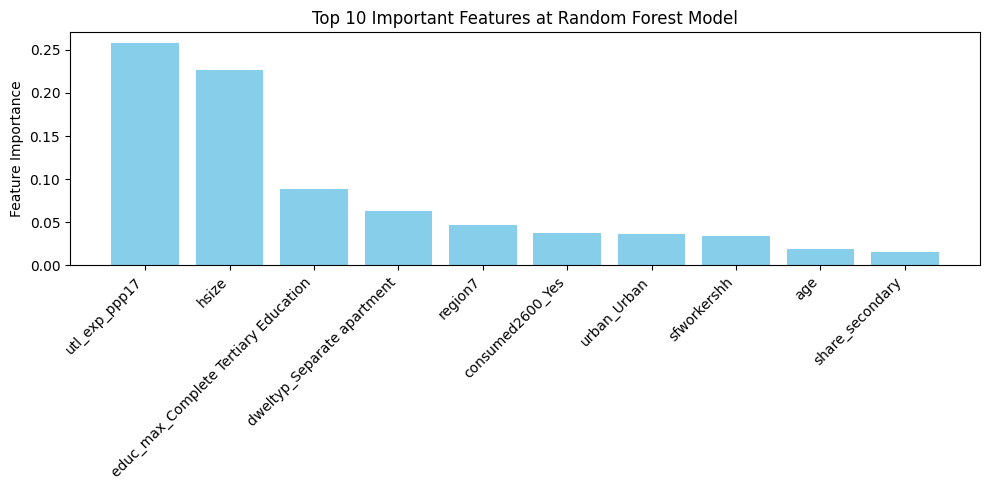

In [51]:
feature_importances = random_forest_model.feature_importances_
feature_names = features.columns

indices = np.argsort(feature_importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

top_features = feature_names[top_indices]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(10, 5))
plt.bar(top_features, top_importances, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature Importance")
plt.title(f"Top {top_n} Important Features at Random Forest Model")
plt.tight_layout()
plt.show()

In [52]:
importances = pd.Series(random_forest_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print(importances.head(10))

utl_exp_ppp17                           0.257289
hsize                                   0.226889
educ_max_Complete Tertiary Education    0.088978
dweltyp_Separate apartment              0.063540
region7                                 0.046703
consumed2600_Yes                        0.037116
urban_Urban                             0.036617
sfworkershh                             0.033763
age                                     0.018512
share_secondary                         0.015805
dtype: float64


## Lasso Regression

### Scaling

In [53]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Πρώτα γίνεται scaling στα δεδομένα για να έρθουν όλες οι μεταβλητές στην ίδια κλίμακα, ώστε η ποινή του Lasso να μην επηρεάζεται από το μέγεθος των τιμών τους

### Εκπαίδευση Lasso

In [54]:
lasso_model = LassoCV(
    cv= 5,
    max_iter= 20000,
    n_jobs= -1,
    random_state= seed
)

lasso_model.fit(x_train_scaled, y_train, sample_weight=w_train)

LassoCV(cv=5, max_iter=20000, n_jobs=-1, random_state=42)

### Εμφάνιση του alpha που επέλεξε

In [55]:
print("Best alpha:", lasso_model.alpha_)

Best alpha: 0.004993713831951244


### Εμφάνιση πλήθους feautres που κράτησε

In [56]:
n_selected = (lasso_model.coef_ != 0).sum()
print("Lasso model selected ", n_selected, " features from ", x_train_scaled.shape[1])

Lasso model selected  111  features from  141


### Υπολογισμός MAE και MAPE

In [57]:
y_pred_at_test= lasso_model.predict(x_test_scaled)
y_pred_at_train= lasso_model.predict(x_train_scaled)

mae_train_lasso= mean_absolute_error(y_train, y_pred_at_train, sample_weight=w_train)
mae_test_lasso= mean_absolute_error(y_test, y_pred_at_test, sample_weight=w_test)

mape_train_lasso= mean_absolute_percentage_error(y_train, y_pred_at_train, sample_weight=w_train)
mape_test_lasso= mean_absolute_percentage_error(y_test, y_pred_at_test, sample_weight=w_test)

print("MAE for train is: ", mae_train_lasso)
print("MAE for test is: ", mae_test_lasso)
print()
print("MAPE for train is: ", mape_train_lasso)
print("MAPE for test is: ", mape_test_lasso)

MAE for train is:  3.735607358636518
MAE for test is:  3.724409004493734

MAPE for train is:  0.4119655327604145
MAPE for test is:  0.4119711405730425


### Εμφάνιση Σημαντικότητας των μεταβλητών στο Lasso

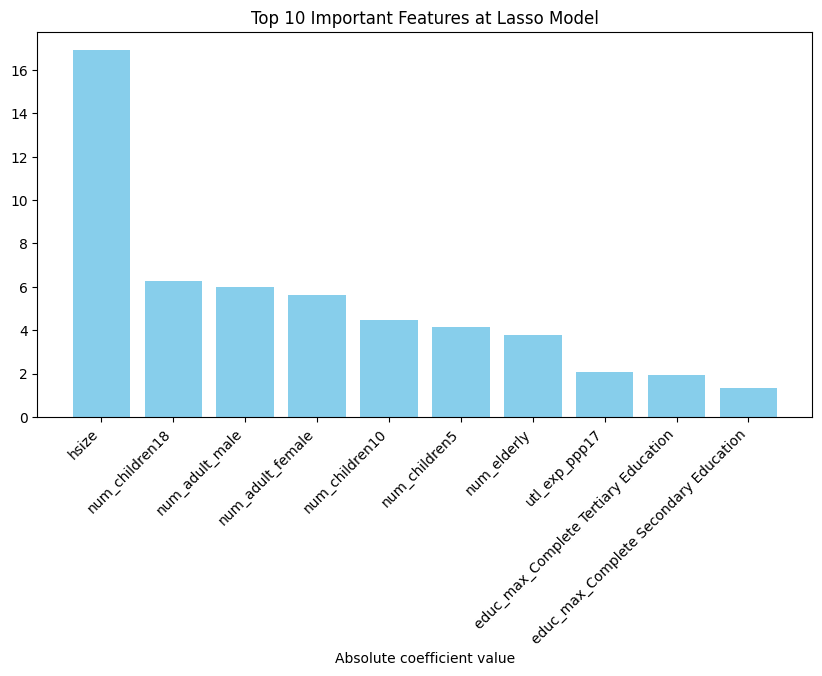

In [58]:
coefs = lasso_model.coef_
features = x_train.columns

top_n = 10
top_idx = np.argsort(np.abs(coefs))[-top_n:]
top_features = features[top_idx]
top_coefs = coefs[top_idx]

sorted_idx = np.argsort(np.abs(top_coefs))[::-1]
top_features = top_features[sorted_idx]
top_coefs = top_coefs[sorted_idx]

plt.figure(figsize=(10, 5))
plt.bar(top_features, np.abs(top_coefs), color="skyblue")
plt.xlabel('Absolute coefficient value')
plt.title(f"Top {top_n} Important Features at Lasso Model")
plt.xticks(rotation=45, ha='right')
plt.show()

## XGBRegressor

In [59]:
xgb_model= XGBRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    random_state= seed
)

xgb_model.fit(x_train, y_train, sample_weight=w_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=None, num_parallel_tree=None, ...)

### Υπολογισμός MAE και MAPE

In [60]:
y_pred_at_test= xgb_model.predict(x_test)
y_pred_at_train= xgb_model.predict(x_train)

mae_train_xgb_model= mean_absolute_error(y_train, y_pred_at_train, sample_weight=w_train)
mae_test_xgb_model= mean_absolute_error(y_test, y_pred_at_test, sample_weight=w_test)

mape_train_xgb_model= mean_absolute_percentage_error(y_train, y_pred_at_train, sample_weight=w_train)
mape_test_xgb_model= mean_absolute_percentage_error(y_test, y_pred_at_test, sample_weight=w_test)

print("MAE for train is: ", mae_train_xgb_model)
print("MAE for test is: ", mae_test_xgb_model)
print()
print("MAPE for train is: ", mape_train_xgb_model)
print("MAPE for test is: ", mape_test_xgb_model)

MAE for train is:  2.897513352373098
MAE for test is:  3.091293794819511

MAPE for train is:  0.2834934726039908
MAPE for test is:  0.2994900862268782


### Εμφάνιση Σημαντικότητας των μεταβλητών στον XGBRegressor

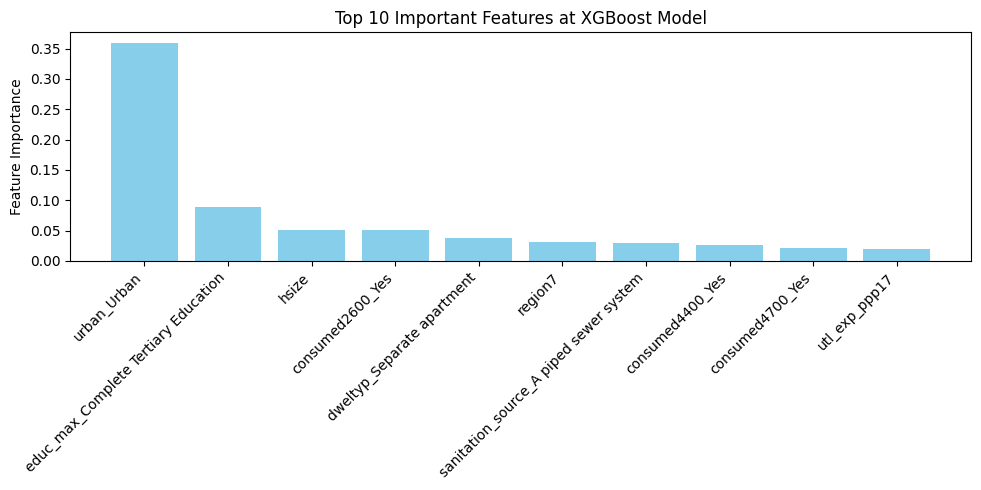

In [61]:
feature_importances = xgb_model.feature_importances_
feature_names = x_train.columns

indices = np.argsort(feature_importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

top_features = feature_names[top_indices]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(10, 5))
plt.bar(top_features, top_importances, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature Importance")
plt.title(f"Top {top_n} Important Features at XGBoost Model")
plt.tight_layout()
plt.show()

## MLP

### Scaling

In [62]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Εκπαίδευση MLP

In [63]:
input_size= (x_train_scaled.shape[1], )

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= input_size),

    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1)
], name= "MLP")

mlp_model.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,313 (114.50 KB)

 Trainable params: 28,929 (113.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [64]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
mlp_model.compile(
    optimizer= optimizer,
    loss='mae',
    metrics=['mape']
)

batch_size= 128
epochs= 100

history = mlp_model.fit(
    x_train_scaled, y_train,
    sample_weight=w_train,
    epochs= epochs,
    batch_size= batch_size,
    validation_data=(x_test_scaled, y_test, w_test),
)

Epoch 1/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 8413.4189 - mape: 85.2752 - val_loss: 4371.3184 - val_mape: 51.2212
Epoch 2/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4411.7812 - mape: 48.4414 - val_loss: 3349.9399 - val_mape: 37.8139
Epoch 3/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3586.1233 - mape: 38.5755 - val_loss: 3077.3879 - val_mape: 33.0197
Epoch 4/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 3399.3552 - mape: 35.5265 - val_loss: 2962.5054 - val_mape: 31.3031
Epoch 5/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3217.4390 - mape: 33.9511 - val_loss: 2904.5640 - val_mape: 30.3627
Epoch 6/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3187.9673 - mape: 33.1522 - val_loss: 2868.0371 - val_mape: 29.7687
Epoch 7/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3112.3955 - mape: 32.4370 - val_loss: 2837.0500 - val_mape: 29.4775
Epoch 8/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3113.4031 - mape: 32.1016 - val_los

### Εμφάνιση loss history και accuracy history για τα δεδομένα train, test.

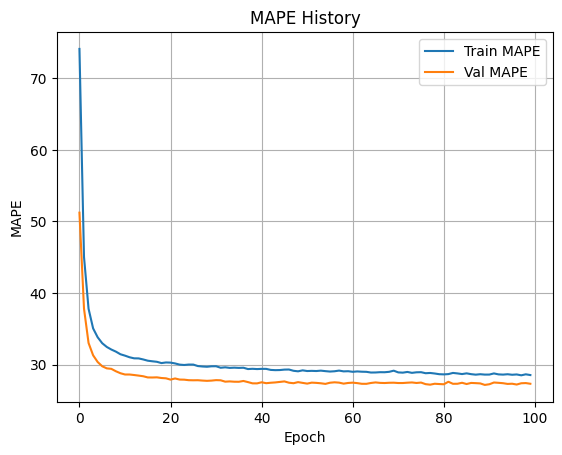

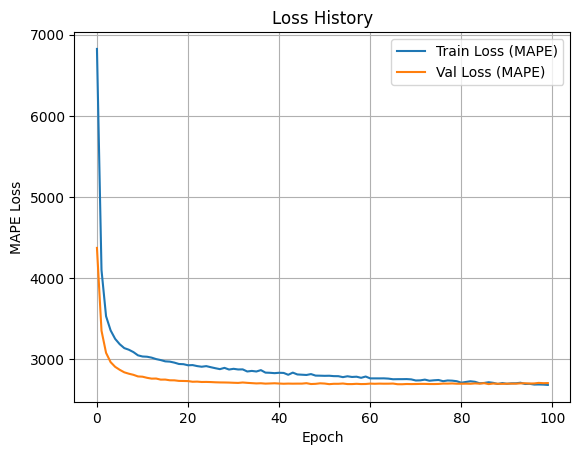

In [65]:
plt.plot(history.history['mape'], label='Train MAPE')
plt.plot(history.history['val_mape'], label='Val MAPE')
plt.title('MAPE History')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss (MAPE)')
plt.plot(history.history['val_loss'], label='Val Loss (MAPE)')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('MAPE Loss')
plt.legend()
plt.grid(True)
plt.show()

Σύμφωνα με τις παραπάνω καμπύλες, γίνεται αντιληπτό ότι μετά τις 80 επαναλήψεις δεν υπάρχει κάποια ιδιαίτερη βελτίωση. Οπότε ξανα εκπαιδεύεται το μοντέλο με 80 epochs.

In [66]:
input_size= (x_train_scaled.shape[1], )

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= input_size),

    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1)
], name= "MLP")

mlp_model.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,313 (114.50 KB)

 Trainable params: 28,929 (113.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [67]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
mlp_model.compile(
    optimizer= optimizer,
    loss='mae',
    metrics=['mape']
)

batch_size= 128
epochs= 80

history = mlp_model.fit(
    x_train_scaled, y_train,
    sample_weight=w_train,
    epochs= epochs,
    batch_size= batch_size,
    validation_data=(x_test_scaled, y_test, w_test),
)

Epoch 1/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8396.4062 - mape: 85.4069 - val_loss: 4249.9883 - val_mape: 47.5652
Epoch 2/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4341.2549 - mape: 45.6779 - val_loss: 3284.3196 - val_mape: 36.3316
Epoch 3/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3528.0723 - mape: 37.2731 - val_loss: 3046.6694 - val_mape: 32.7644
Epoch 4/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3401.2463 - mape: 34.7385 - val_loss: 2947.0522 - val_mape: 31.1706
Epoch 5/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3237.5786 - mape: 33.5413 - val_loss: 2889.3418 - val_mape: 30.3880
Epoch 6/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3227.3420 - mape: 32.8322 - val_loss: 2861.5000 - val_mape: 29.7792
Epoch 7/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3128.9131 - mape: 32.2409 - val_loss: 2829.9719 - val_mape: 29.4604
Epoch 8/80
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3110.9329 - mape: 31.7957 - val_loss: 2814.8

### Εμφάνιση loss history και accuracy history για τα δεδομένα train, test

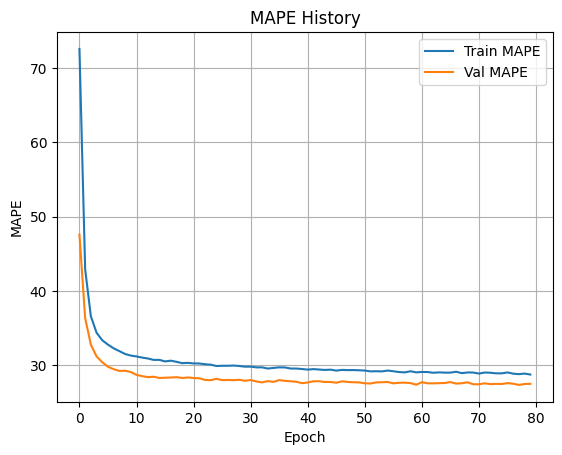

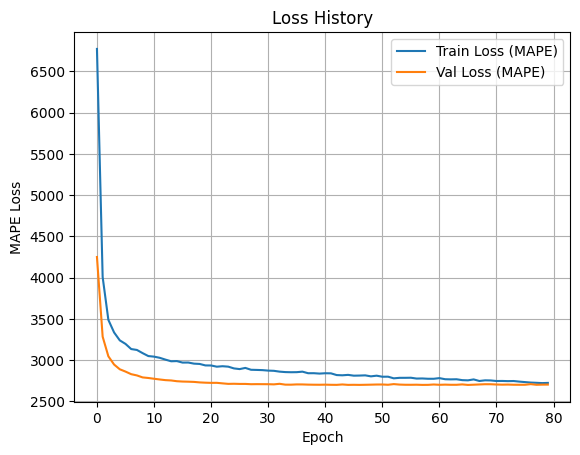

In [68]:
plt.plot(history.history['mape'], label='Train MAPE')
plt.plot(history.history['val_mape'], label='Val MAPE')
plt.title('MAPE History')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss (MAPE)')
plt.plot(history.history['val_loss'], label='Val Loss (MAPE)')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('MAPE Loss')
plt.legend()
plt.grid(True)
plt.show()

## Συνάρτηση δημιουργίας αρχείου poverty_distribution

In [69]:
def create_poverty_distribution_csv_file(df_features, df_targets, name_of_file):
  thresholds = [3.17, 3.94, 4.60, 5.26, 5.88, 6.47, 7.06, 7.70, 8.40, 9.13,
              9.87, 10.70, 11.62, 12.69, 14.03, 15.64, 17.76, 20.99, 27.37]

  temp_df = pd.merge(df_features, df_targets, on=['hhid', 'survey_id'])
  temp_df= temp_df[['hhid', 'survey_id', 'weight', "cons_ppp17"]]

  all_the_rates= []
  for surevey_id in temp_df.survey_id.unique():
      survey_subset = temp_df[temp_df['survey_id'] == surevey_id]
      total_weight = survey_subset['weight'].sum()
      row_to_add = {'survey_id': surevey_id}

      for threshold in thresholds:
        mask = survey_subset['cons_ppp17'] < threshold
        weighted_poor = survey_subset.loc[mask, 'weight'].sum()
        row_to_add[f'pct_hh_below_{threshold:.2f}'] = weighted_poor / total_weight

      all_the_rates.append(row_to_add)

  df_reconstructed = pd.DataFrame(all_the_rates)
  df_reconstructed.to_csv(name_of_file, index=False)

## Διάβασμα αρχείου test_hh_features.csv

In [70]:
test_features = pd.read_csv('data/test_hh_features.csv')
test_features.shape

(103023, 88)

### Χειρισμός μεταβλητών employed και sector1d

Ανάλογα την τιμή της employed ορίζουμε και τις νέες τιμές για το sector1d

In [71]:
df_with_null_values_at_sector1d= test_features[test_features['sector1d'].isna()]
print("At df with null values for the sector1d, the column employed takes the values: ",df_with_null_values_at_sector1d['employed'].unique())

df_with_no_null_values_at_sector1d = test_features[test_features['sector1d'].notna()]
print("At df with no null values for the sector1d, the column employed takes the values: ", df_with_no_null_values_at_sector1d['employed'].unique())

At df with null values for the sector1d, the column employed takes the values:  ['Not employed' nan]
At df with no null values for the sector1d, the column employed takes the values:  ['Employed']


In [72]:
test_features.loc[
    (test_features['employed'] == 'Not employed') & (test_features['sector1d'].isna()),
    'sector1d'
] = 'Unemployed'

In [73]:
df_with_null_values_at_sector1d= test_features[test_features['sector1d'].isna()]
print("At df with null values for the sector1d, the column employed takes the values: ",df_with_null_values_at_sector1d['employed'].unique())

df_with_no_null_values_at_sector1d = test_features[test_features['sector1d'].notna()]
print("At df with no null values for the sector1d, the column employed takes the values: ", df_with_no_null_values_at_sector1d['employed'].unique())

At df with null values for the sector1d, the column employed takes the values:  [nan]
At df with no null values for the sector1d, the column employed takes the values:  ['Employed' 'Not employed']


In [74]:
print("Count of total null values in the employed, when the sector1d is null: ", df_with_null_values_at_sector1d['employed'].isna().sum())
print("Count of total null values in the employed: ",test_features['employed'].isna().sum())

Count of total null values in the employed, when the sector1d is null:  54
Count of total null values in the employed:  54


In [75]:
test_features= test_features.drop(columns= ["employed"])

### Εμφάνιση missing values στο αρχείο

In [76]:
missing_values = test_features.isnull().sum()
missing_only = missing_values[missing_values > 0].sort_values(ascending=False)

missing_only

,0
dweltyp,1122
utl_exp_ppp17,283
consumed5000,104
consumed4900,88
consumed4400,86
consumed4600,79
consumed4800,77
consumed4700,77
consumed4500,76
consumed4300,76


Για τον χειρισμό των missing values θα χρησιμοποιηθεί το df_before_one_hot_encoding, με σκοπό την συμπλήρωση των στηλών που λείπουν στις κατηγορηματικές μεταβλητές

### Χειρισμός dweltyp

#### Εισαγωγή στο dweltyp της επικρατέστερης τιμής με βάση στο strata και region που ανήκει

In [77]:
test_features['region_string'] = test_features[region_cols].astype(str).agg(''.join, axis=1)

combinations = df_before_one_hot_encoding[['region_string', 'strata']].drop_duplicates().values

most_common_according_to_combination= {}

for combination in combinations:
  region, strata= combination

  mask = (df_before_one_hot_encoding['region_string'] == region) & (df_before_one_hot_encoding['strata'] == strata)
  most_common_dweling_at_strata_and_region = df_before_one_hot_encoding[mask]['dweltyp'].mode()
  most_common_according_to_combination[tuple(combination)]= most_common_dweling_at_strata_and_region[0]


for key in most_common_according_to_combination:
  mask = (
    test_features["dweltyp"].isna() &
    (test_features["region_string"] == key[0]) &
    (test_features["strata"] == key[1])
  )

  test_features.loc[mask, "dweltyp"] = most_common_according_to_combination[key]


#### Έλεγχος για missing values

In [78]:
test_features['dweltyp'].isnull().sum()

np.int64(0)

### Χειρισμός utl_exp_ppp17

#### Εισαγωγή στο utl_exp_ppp17 της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκει

In [79]:
combinations = df_before_one_hot_encoding[['region_string', 'strata']].drop_duplicates().values

most_common_according_to_combination= {}

for combination in combinations:
  region, strata= combination

  mask = (df_before_one_hot_encoding['region_string'] == region) & (df_before_one_hot_encoding['strata'] == strata)
  most_common_utl_exp_ppp17_at_strata_and_region = df_before_one_hot_encoding[mask]['utl_exp_ppp17'].median()
  most_common_according_to_combination[tuple(combination)]= most_common_utl_exp_ppp17_at_strata_and_region

for key in most_common_according_to_combination:
  mask = (
    test_features["utl_exp_ppp17"].isna() &
    (test_features["region_string"] == key[0]) &
    (test_features["strata"] == key[1])
  )

  test_features.loc[mask, "utl_exp_ppp17"] = most_common_according_to_combination[key]

#### Έλεγχος missing values στο utl_exp_ppp17

In [80]:
test_features['utl_exp_ppp17'].isnull().sum()

np.int64(0)

### Χειρισμός consumed{n}

Εισαγωγή στα consumed{n} της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκουν

In [81]:
combinations = df_before_one_hot_encoding[['region_string', 'strata']].drop_duplicates().values

most_common_according_to_combination= {}

for combination in combinations:
  region, strata= combination

  mask= (df_before_one_hot_encoding['region_string'] == region) & (df_before_one_hot_encoding['strata'] == strata)


  for i in range(100, 5001, 100):
    column_name = f'consumed{i}'
    group_mode = df_before_one_hot_encoding[mask][column_name].mode()
    most_common_according_to_combination[tuple(combination) + (column_name, )]= group_mode[0]


  for key in most_common_according_to_combination:
    mask = (
      test_features[key[2]].isna() &
      (test_features["region_string"] == key[0]) &
      (test_features["strata"] == key[1])
    )

    test_features.loc[mask, key[2]] = most_common_according_to_combination[key]

#### Έλεγχος missing values στα consumed{n}

In [82]:
are_all_zeros= True
for i in range(100, 5001, 100):
  column_name = f'consumed{i}'
  if test_features[column_name].isnull().sum() >0:
    are_all_zeros= False
    break

print("Are all zeros?\nAnswer: ", are_all_zeros)

Are all zeros?
Answer:  True


### Χειρισμός sector1d

#### Εισαγωγή στο sector1d της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκει

In [83]:
combinations = df_before_one_hot_encoding[['region_string', 'strata']].drop_duplicates().values

most_common_according_to_combination= {}

for combination in combinations:
  region, strata= combination

  mask= (df_before_one_hot_encoding['region_string'] == region) & (df_before_one_hot_encoding['strata'] == strata)
  group_mode_sector1d= df_before_one_hot_encoding[mask]['sector1d'].mode()
  most_common_according_to_combination[tuple(combination)]= group_mode_sector1d[0]


  for key in most_common_according_to_combination:
    mask = (
      test_features["sector1d"].isna() &
      (test_features["region_string"] == key[0]) &
      (test_features["strata"] == key[1])
    )

    test_features.loc[mask, "sector1d"] = most_common_according_to_combination[key]

#### Έλεγχος missing values στo sector1d

In [84]:
test_features['sector1d'].isnull().sum()

np.int64(0)

### Χειρισμός educ_max

#### Εισαγωγή στο educ_max της επικρατέστερης τιμής με βάση το strata και στο region στο οποίο ανήκει

In [85]:
combinations = df_before_one_hot_encoding[['region_string', 'strata']].drop_duplicates().values

most_common_according_to_combination= {}

for combination in combinations:
  region, strata= combination

  mask= (df_before_one_hot_encoding['region_string'] == region) & (df_before_one_hot_encoding['strata'] == strata)
  group_mode_educ_max= df_before_one_hot_encoding[mask]['educ_max'].mode()
  most_common_according_to_combination[tuple(combination)]= group_mode_educ_max[0]

for key in most_common_according_to_combination:
    mask = (
      test_features["educ_max"].isna() &
      (test_features["region_string"] == key[0]) &
      (test_features["strata"] == key[1])
    )

    test_features.loc[mask, "educ_max"] = most_common_according_to_combination[key]

#### Έλεγχος missing values στo educ_max

In [86]:
test_features['educ_max'].isnull().sum()

np.int64(0)

### Χειρισμός share_secondary για missing values

Επειδή η στήλη educ_max δείχνει το υψηλότερο επίπεδο εκπαίδευσης που έχει επιτευχθεί από τουλάχιστον ένα μέλος του νοικοκυριού, τότε αν αυτό είναι κάτω από το "Complete Secondary Education", τότε η τιμή του share_secondary θα είναι ίση με 0, αφού κανένα μέλος (και άρα ενήλικας), δεν έχει λάβει αυτήν την εκπαίδευση

In [87]:
under_secondary_edu_levels = [
    'Never attended',
    'Incomplete Primary Education',
    'Complete Primary Education',
    'Incomplete Secondary Education'
]

mask_to_fill_zero = (test_features['share_secondary'].isnull()) & (test_features['educ_max'].isin(under_secondary_edu_levels))
test_features.loc[mask_to_fill_zero, 'share_secondary'] = 0

#### Έλεγχος missing values στo share_secondary

In [88]:
test_features['share_secondary'].isnull().sum()

np.int64(7)

#### Για τις υπόλοιπες τιμές θα χρησιμοποιήσουμε το median

In [89]:
combinations = df_before_one_hot_encoding[['region_string', 'strata']].drop_duplicates().values

most_common_according_to_combination= {}

for combination in combinations:
  region, strata= combination

  mask= (df_before_one_hot_encoding['region_string'] == region) & (df_before_one_hot_encoding['strata'] == strata)
  most_common_utl_share_secondary_at_strata_and_region = df_before_one_hot_encoding[mask]['share_secondary'].median()
  most_common_according_to_combination[tuple(combination)]= most_common_utl_share_secondary_at_strata_and_region

for key in most_common_according_to_combination:
  mask = (
    test_features["share_secondary"].isna() &
    (test_features["region_string"] == key[0]) &
    (test_features["strata"] == key[1])
  )

  test_features.loc[mask, "share_secondary"] = most_common_according_to_combination[key]

#### Έλεγχος missing values στo share_secondary

In [90]:
test_features['share_secondary'].isnull().sum()

np.int64(0)

### Εμφάνισει των missing values

In [91]:
missing_values = test_features.isnull().sum()
missing_only = missing_values[missing_values > 0].sort_values(ascending=False)

missing_only

,0


### Διαγραφή βοηθητικής στήλης region_string

In [92]:
test_features= test_features.drop(columns= ["region_string"])

### Διαγραφή του βοηθητικού dataframe: df_before_one_hot_encoding

In [93]:
del df_before_one_hot_encoding

### Μετατροπή των Categorical Variables σε Numerical Variables

#### Εμφάνιση όλων των στηλών του dataframe

In [94]:
test_features.columns

Index(['hhid', 'com', 'weight', 'strata', 'utl_exp_ppp17', 'male', 'hsize',
       'num_children5', 'num_children10', 'num_children18', 'age', 'owner',
       'water', 'toilet', 'sewer', 'elect', 'water_source',
       'sanitation_source', 'dweltyp', 'num_adult_female', 'num_adult_male',
       'num_elderly', 'sworkershh', 'share_secondary', 'educ_max',
       'sfworkershh', 'any_nonagric', 'sector1d', 'region1', 'region2',
       'region3', 'region4', 'region5', 'region6', 'region7', 'urban',
       'consumed100', 'consumed200', 'consumed300', 'consumed400',
       'consumed500', 'consumed600', 'consumed700', 'consumed800',
       'consumed900', 'consumed1000', 'consumed1100', 'consumed1200',
       'consumed1300', 'consumed1400', 'consumed1500', 'consumed1600',
       'consumed1700', 'consumed1800', 'consumed1900', 'consumed2000',
       'consumed2100', 'consumed2200', 'consumed2300', 'consumed2400',
       'consumed2500', 'consumed2600', 'consumed2700', 'consumed2800',
       'consu

#### Μεταβλητή strata

Η τιμή strata όπως και κατά την διάρκεια της εκπαίδευσης, πρέπει να χειριστεί ως categorical και όχι ως numeric, καθώς αποτελεί μια ετικέτα και όχι μια ποσοτική μεταβλητή.

In [95]:
test_features= pd.get_dummies(test_features, columns=['strata'], drop_first=True)

### Εύρεση όλων των categorical variables του dataframe

In [96]:
categorical_columns = test_features.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['male',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'water_source',
 'sanitation_source',
 'dweltyp',
 'educ_max',
 'any_nonagric',
 'sector1d',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',
 'consumed3100',
 'consumed3200',
 'consumed3300',
 'consumed3400',
 'consumed3500',
 'consumed3600',
 'consumed3700',
 'consumed3800',
 'consumed3900',
 'consumed4000',
 'consumed4100',
 'consumed4200',
 'consumed4300',
 'consumed4400',
 'consumed4500',
 'consumed4600',
 'consumed4700',
 'consumed4800',
 'consumed4900',
 'consumed50

### Εφαρμογή One-Hot-Encoding για όλες τις στήλες των categorical variables

#### Μεταβλητή dweltyp

In [97]:
possible_categories= [
    "Detached house",
    "Multi-family house",
    "Separate apartment",
    "Communal apartment",
    "Room in a larger dwelling",
    "Several buildings connected",
    "Several separate buildings",
    "Improvised housing unit",
    "Other"
]

cat_type = CategoricalDtype(categories=possible_categories)

test_features['dweltyp']= test_features['dweltyp'].astype(cat_type)
test_features = pd.get_dummies(test_features, columns=['dweltyp'], drop_first=True)

#### Μεταβλητή educ_max

In [98]:
possible_categories= [
    "Never attended",
    "Incomplete Primary Education",
    "Complete Primary Education",
    "Incomplete Secondary Education",
    "Complete Secondary Education",
    "Incomplete Tertiary Education",
    "Complete Tertiary Education"
]

cat_type = CategoricalDtype(categories=possible_categories)

test_features['educ_max']= test_features['educ_max'].astype(cat_type)
test_features = pd.get_dummies(test_features, columns=['educ_max'], drop_first=True)

#### Μεταβλητή sanitation_source

In [99]:
possible_categories= [
    "A flush toilet",
    "A piped sewer system",
    "A septic tank",
    "Pit latrine",
    "Ventilated improved pit latrine",
    "Pit latrine with slab",
    "Composting toilet",
    "Special case",
    "A flush/pour flush to elsewhere",
    "A pit latrine without slab",
    "Bucket",
    "Hanging toilet or hanging latrine",
    "No facilities or bush or field",
    "Other"
]

cat_type = CategoricalDtype(categories=possible_categories)

test_features['sanitation_source']= test_features['sanitation_source'].astype(cat_type)
test_features = pd.get_dummies(test_features, columns=['sanitation_source'], drop_first=True)

#### Μεταβλητή sector1d

In [100]:
possible_categories= [
    "Agriculture, hunting and forestry",
    "Fishing",
    "Mining and quarrying",
    "Manufacturing",
    "Electricity, gas and water supply",
    "Construction",
    "Wholesale and retail trade",
    "Hotels and restaurants",
    "Transport, storage and communications",
    "Financial intermediation",
    "Real estate, renting and business activities",
    "Public administration and defence",
    "Education",
    "Health and social work",
    "Other community, social and personal service activities",
    "Activities of private households as employers",
    "Extraterritorial organizations and bodies",
    "Unemployed"
]


cat_type = CategoricalDtype(categories=possible_categories)

test_features['sector1d']= test_features['sector1d'].astype(cat_type)
test_features = pd.get_dummies(test_features, columns=['sector1d'], drop_first=True)

#### Μεταβλητή water_source

In [101]:
possible_categories= [
    "Piped water into dwelling",
    "Piped water to yard/plot",
    "Public tap or standpipe",
    "Tubewell or borehole",
    "Protected dug well",
    "Protected spring",
    "Bottled water",
    "Rainwater",
    "Unprotected spring",
    "Unprotected dug well",
    "Cart with small tank/drum",
    "Tanker-truck",
    "Surface water",
    "Other"
]


cat_type = CategoricalDtype(categories=possible_categories)

test_features['water_source']= test_features['water_source'].astype(cat_type)
test_features = pd.get_dummies(test_features, columns=['water_source'], drop_first=True)

#### Εμφάνιση των υπολειπόμενων categorical μεταβλητών

In [102]:
categorical_columns = test_features.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['male',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'any_nonagric',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',
 'consumed3100',
 'consumed3200',
 'consumed3300',
 'consumed3400',
 'consumed3500',
 'consumed3600',
 'consumed3700',
 'consumed3800',
 'consumed3900',
 'consumed4000',
 'consumed4100',
 'consumed4200',
 'consumed4300',
 'consumed4400',
 'consumed4500',
 'consumed4600',
 'consumed4700',
 'consumed4800',
 'consumed4900',
 'consumed5000']

#### One-Hot-Encoding και στις υπόλοιπες μεταβλητές

In [103]:
test_features= pd.get_dummies(test_features, columns=categorical_columns, drop_first=True)

### Έλεγχος αν υπάρχουν πλέον categorical variables

In [104]:
categorical_columns = test_features.select_dtypes(include=['object', 'category']).columns.tolist()
len(categorical_columns)

0

### Εμφάνιση των στηλών που υπάρχουν πλέον στο dataframe

In [105]:
test_features.columns

Index(['hhid', 'com', 'weight', 'utl_exp_ppp17', 'hsize', 'num_children5',
       'num_children10', 'num_children18', 'age', 'num_adult_female',
       ...
       'consumed4100_Yes', 'consumed4200_Yes', 'consumed4300_Yes',
       'consumed4400_Yes', 'consumed4500_Yes', 'consumed4600_Yes',
       'consumed4700_Yes', 'consumed4800_Yes', 'consumed4900_Yes',
       'consumed5000_Yes'],
      dtype='object', length=145)

## Πρόβλεψη

Για την πρόβλεψη, πρέπει να αφαιρεθούν οι στήλες hhid, com, survey_id και weight.

In [106]:
features= test_features.drop(columns= ["weight", "hhid", "com", "survey_id"])

### Χρήση μοντέλου RandomForestRegressor

In [107]:
y_pred= random_forest_model.predict(features)
y_pred.shape

(103023,)

#### Δημιουργία dataframe στην μορφή για το predicted_household_consumption.csv

In [108]:
predicted_household_consumption= test_features.copy()
predicted_household_consumption['cons_ppp17']= y_pred
predicted_household_consumption= predicted_household_consumption[['survey_id', 'hhid', 'cons_ppp17']]
predicted_household_consumption.columns

Index(['survey_id', 'hhid', 'cons_ppp17'], dtype='object')

#### Δημιουργία αρχείου predicted_household_consumption.csv

In [109]:
predicted_household_consumption.to_csv("predicted_household_consumption_randomForest.csv", index=False)

#### Δημιουργία αρχείου predicted_poverty_distribution

In [110]:
create_poverty_distribution_csv_file(df_features= test_features, df_targets= predicted_household_consumption, name_of_file= "predicted_poverty_distribution_randomForest.csv")

### Χρήση μοντέλου Lasso

Scaling

In [111]:
scaler= StandardScaler()

features_scaling= scaler.fit_transform(features)

In [112]:
y_pred= lasso_model.predict(features_scaling)
y_pred.shape

(103023,)

#### Δημιουργία dataframe στην μορφή για το predicted_household_consumption.csv

In [113]:
predicted_household_consumption= test_features.copy()
predicted_household_consumption['cons_ppp17']= y_pred
predicted_household_consumption= predicted_household_consumption[['survey_id', 'hhid', 'cons_ppp17']]
predicted_household_consumption.columns

Index(['survey_id', 'hhid', 'cons_ppp17'], dtype='object')

#### Δημιουργία αρχείου predicted_household_consumption.csv

In [114]:
predicted_household_consumption.to_csv("predicted_household_consumption_lasso.csv", index=False)

#### Δημιουργία αρχείου predicted_poverty_distribution

In [115]:
create_poverty_distribution_csv_file(df_features= test_features, df_targets= predicted_household_consumption, name_of_file= "predicted_poverty_distribution_lasso.csv")

### Χρήση μοντέλου XGBRegressor

In [116]:
y_pred= xgb_model.predict(features)
y_pred.shape

(103023,)

#### Δημιουργία dataframe στην μορφή για το predicted_household_consumption.csv

In [117]:
predicted_household_consumption= test_features.copy()
predicted_household_consumption['cons_ppp17']= y_pred
predicted_household_consumption= predicted_household_consumption[['survey_id', 'hhid', 'cons_ppp17']]
predicted_household_consumption.columns

Index(['survey_id', 'hhid', 'cons_ppp17'], dtype='object')

#### Δημιουργία αρχείου predicted_household_consumption.csv

In [118]:
predicted_household_consumption.to_csv("predicted_household_consumption_xgb.csv", index=False)

#### Δημιουργία αρχείου predicted_poverty_distribution

In [119]:
create_poverty_distribution_csv_file(df_features= test_features, df_targets= predicted_household_consumption, name_of_file= "predicted_poverty_distribution_xgb.csv")

### Χρήση μοντέλου MLP

Scaling

In [120]:
scaler= StandardScaler()

features_scaling= scaler.fit_transform(features)

In [121]:
y_pred= mlp_model.predict(features_scaling)
y_pred = y_pred.flatten()
y_pred.shape

3220/3220 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


(103023,)

#### Δημιουργία dataframe στην μορφή για το predicted_household_consumption.csv

In [122]:
predicted_household_consumption= test_features.copy()
predicted_household_consumption['cons_ppp17']= y_pred
predicted_household_consumption= predicted_household_consumption[['survey_id', 'hhid', 'cons_ppp17']]
predicted_household_consumption.columns

Index(['survey_id', 'hhid', 'cons_ppp17'], dtype='object')

#### Δημιουργία αρχείου predicted_household_consumption.csv

In [123]:
predicted_household_consumption.to_csv("predicted_household_consumption_mlp.csv", index=False)

#### Δημιουργία αρχείου predicted_poverty_distribution

In [124]:
create_poverty_distribution_csv_file(df_features= test_features, df_targets= predicted_household_consumption, name_of_file= "predicted_poverty_distribution_mlp.csv")